In [7]:
# Import our dependencies
import csv
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [9]:
df_Close = df_SPY["Close"]
df_Close.name = "SPY"

In [10]:
df_Close

Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2022-07-11    384.230011
2022-07-12    380.829987
2022-07-13    378.829987
2022-07-14    377.910004
2022-07-15    385.130005
Name: SPY, Length: 639, dtype: float64

In [12]:
#10 Companies in Consumer Discretionary

symbols = ["AMZN", "LOW", "NKE", "TSLA", "AAP", "EBAY", "HD", "SBUX", "F", "EXPE"]

for symbol in symbols:
    stock = web.DataReader(symbol, 'yahoo', start='2020-01-01', end = dt.datetime.today())
    stock.to_csv(f"{symbol}.csv")
    
print("Complete")

Complete


In [13]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [14]:
df = df_SPY[["Close"]]
df = df.rename(columns = {"Close": "SPY"})
df

,SPY
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012
...,...
2022-07-11,384.230011
2022-07-12,380.829987
2022-07-13,378.829987


In [15]:
## Note: If you need another column, Change "Close" to respective column, e.g., "Volume"
## Note: SPY is a standard dataset for getting ALL traded dates correctly, and any NULL values are dropped here, and SPY column is also dropped

symbols = ["AMZN", "LOW", "NKE", "TSLA", "AAP", "EBAY", "HD", "SBUX", "F", "EXPE"]

def get_data(symbols):    
    df = df_SPY[["Close"]]
    df = df.rename(columns = {"Close": "SPY"})
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates = True, 
                         usecols = ["Date", "Close"], na_values = "nan")
        df_temp = df_temp.rename(columns = {"Close": symbol})
        df = df.join(df_temp)
    return df
df_CD = get_data(symbols)
df_CD = df_CD.drop(columns="SPY")

In [16]:
df_CD

,AMZN,LOW,NKE,TSLA,AAP,EBAY,HD,SBUX,F,EXPE
Date,,,,,,,,,,
2020-01-02,94.900497,120.459999,102.199997,86.052002,159.410004,36.299999,219.660004,89.349998,9.42,110.980003
2020-01-03,93.748497,119.599998,101.919998,88.601997,159.419998,35.959999,218.929993,88.830002,9.21,109.129997
2020-01-06,95.143997,120.349998,101.830002,90.307999,156.800003,35.779999,219.960007,88.129997,9.16,108.739998
2020-01-07,95.343002,119.629997,101.779999,93.811996,154.940002,35.619999,218.520004,87.860001,9.25,110.019997
2020-01-08,94.598503,121.529999,101.550003,98.428001,153.160004,35.599998,221.789993,88.879997,9.25,108.620003
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,111.750000,180.110001,105.110001,703.030029,181.750000,42.830002,286.390015,77.900002,11.29,91.160004
2022-07-12,109.220001,181.000000,103.760002,699.210022,183.839996,43.200001,285.119995,77.760002,11.56,92.029999
2022-07-13,110.400002,182.369995,105.110001,711.119995,185.339996,42.490002,287.179993,77.919998,11.51,92.980003


In [17]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_AMZN = web.DataReader('AAPL', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_AMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785919
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068565
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650810
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304420
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.483604
...,...,...,...,...,...,...
2022-07-11,146.639999,143.779999,145.669998,144.869995,63141600.0,144.869995
2022-07-12,148.449997,145.050003,145.759995,145.860001,77588800.0,145.860001
2022-07-13,146.449997,142.119995,142.990005,145.490005,71185600.0,145.490005


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

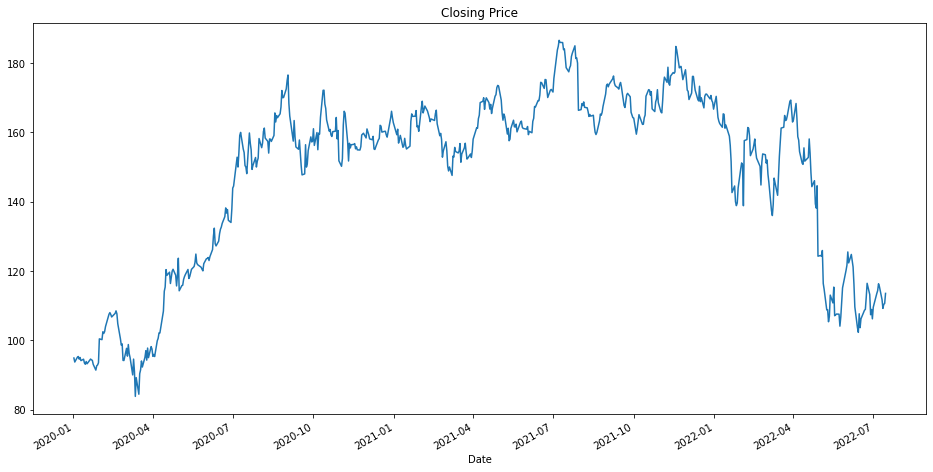

In [19]:
df_CD["AMZN"].plot(figsize = (16, 8), title = "Closing Price")

<AxesSubplot:xlabel='Date'>

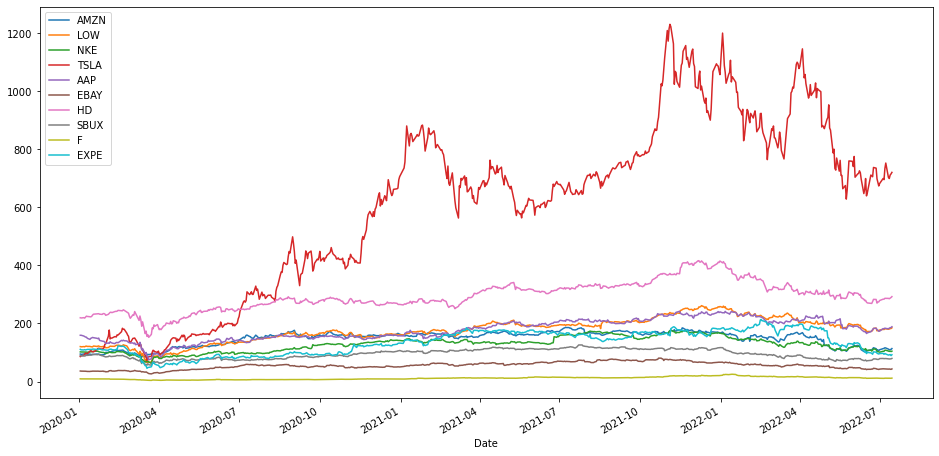

In [20]:
df_CD.plot(figsize = (16, 8))